In [1]:
from sys import argv
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.metrics import RocCurveDisplay, accuracy_score, confusion_matrix, PrecisionRecallDisplay, ConfusionMatrixDisplay, make_scorer, precision_score,recall_score
from sklearn.model_selection import train_test_split, LeavePGroupsOut, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.inspection import permutation_importance
from collections import Counter
complete_features=[
        "AF1",
        "AF2",
        "AF3",
        "AF4",
        "AF5",
        "BLOSUM1",
        "BLOSUM2",
        "BLOSUM3",
        "BLOSUM4",
        "BLOSUM5",
        "BLOSUM6",
        "BLOSUM7",
        "BLOSUM8",
        "BLOSUM9",
        "BLOSUM10",
        "PP1",
        "PP2",
        "PP3",
        "F1",
        "F2",
        "F3",
        "F4",
        "F5",
        "F6",
        "KF1",
        "KF2",
        "KF3",
        "KF4",
        "KF5",
        "KF6",
        "KF7",
        "KF8",
        "KF9",
        "KF10",
        "MSWHIM1",
        "MSWHIM2",
        "MSWHIM3",
        "E1",
        "E2",
        "E3",
        "E4",
        "E5",
        "PD1",
        "PD2",
        "PRIN1",
        "PRIN2",
        "PRIN3",
        "ProtFP1",
        "ProtFP2",
        "ProtFP3",
        "ProtFP4",
        "ProtFP5",
        "ProtFP6",
        "ProtFP7",
        "ProtFP8",
        "SV1",
        "SV2",
        "SV3",
        "SV4",
        "ST1",
        "ST2",
        "ST3",
        "ST4",
        "ST5",
        "ST6",
        "ST7",
        "ST8",
        "SVGER1",
        "SVGER2",
        "SVGER3",
        "SVGER4",
        "SVGER5",
        "SVGER6",
        "SVGER7",
        "SVGER8",
        "SVGER9",
        "SVGER10",
        "SVGER11",
        "T1",
        "T2",
        "T3",
        "T4",
        "T5",
        "VHSE1",
        "VHSE2",
        "VHSE3",
        "VHSE4",
        "VHSE5",
        "VHSE6",
        "VHSE7",
        "VHSE8",
        "VSTPV1",
        "VSTPV2",
        "VSTPV3",
        "VSTPV4",
        "VSTPV5",
        "VSTPV6",
        "Z1",
        "Z2",
        "Z3",
        "Z4",
        "Z5",
        "cys30",
        "cys20",
        "cys_ser30",
        "cys_ser20",
        "charge",
        "avgcharge",
        "avghydrop",
        "length",
        "entropy",
        "entropyratio",
        "boman",
        "instability",
        "aliphatic",
        "A",
        "R",
        "N",
        "D",
        "C",
        "E",
        "Q",
        "G",
        "H",
        "I",
        "L",
        "K",
        "M",
        "F",
        "P",
        "S",
        "T",
        "W",
        "Y",
        "V",
        "RHK",
        "DE",
        "STNQ",
        "CGP",
        "AVIL",
        "MFYW",
    "Alpha50_leader",
"Alpha50_total",
"Total_alpha",
"Beta50_leader",
"Beta50_total",
"Total_beta",
"Coil50_leader",
"Coil50_total",
"Total_coil"
    ]

original_features=[
        "cys30",
        "cys20",
        "cys_ser30",
        "cys_ser20",
        "charge",
        "avgcharge",
        "avghydrop",
        "length",
        "entropy",
        "entropyratio",
        "boman",
        "instability",
        "aliphatic",
        "A",
        "R",
        "N",
        "D",
        "C",
        "E",
        "Q",
        "G",
        "H",
        "I",
        "L",
        "K",
        "M",
        "F",
        "P",
        "S",
        "T",
        "W",
        "Y",
        "V",
        "RHK",
        "DE",
        "STNQ",
        "CGP",
        "AVIL",
        "MFYW"
    ]
feature_selection=['RHK','R','H','K','avghydrop','length','BLOSUM7','PP2','F3','F6','MSWHIM3','E4','PD1','PRIN3','ProtFP5','SV3','SV4','ST7','T3','VHSE5',"cys30",
        "cys20",
        "cys_ser30",
        "cys_ser20",
        "charge",
        "avgcharge"]
ripp_classes=['Guanidinotide',
              'Cyanobactin',
              'Thiopeptide',
              'TBA', 
              'Pearlin',
              'Ryptide',
              'Glycocin', 
              'Borosin',
              'Microcin', 
              'Head-to-tail cyclized peptide',
              'Pantocin', 
              'other',
              'Bottromycin',
              'Mycofactocin',
              'Cyptide', 
              'Streptide', 
              'Epipeptide', 
              'Dikaritin',
              'Proteusin', 
              'Rotapeptide',
              'Microviridin', 
              'Methanobactin', 
              'Ranthipeptide', 
              'Thioamitide',
              'Amatoxin',
              'Cyclotide',
              'Sulfatyrotide',
              'AIP',
              'Selidamide',
              'Graspetide', 
              'Crocagin', 
              'N-Formylated TBA', 
              'Linear azole-containing peptide', 
              'Lanthipeptide',
              'Lasso', 
              'Sactipeptide',
              'Bacteriocin', 
              'Lyciumin',
              'Linaridin']

In [2]:
def svm_training_split(dataset_file,feature_list):
    dataset = pd.read_csv(dataset_file)
    dataset = dataset.drop(labels="sequence", axis=1)
    x = dataset[feature_list]
    y = dataset[["RiPP"]].to_numpy().ravel()
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2,random_state=42)
    return x_train, x_test, y_train, y_test

def class_split_iterable(dataset,class_list):
    custom_cv=[]
    for category in class_list:
        positive_indices=dataset[dataset['Class'].str.contains(category, na=False)].index.tolist()
        negative_indices = dataset[dataset['Class'].str.contains('No_RiPP', na=False)].index.tolist()
        sample_size = min(len(positive_indices), len(negative_indices))  # Handle cases with fewer matches
        random_indices = random.sample(negative_indices, sample_size)
        validation_indices=positive_indices+random_indices
        all_indices = dataset.index.tolist()
        training_indices = list(set(all_indices) - set(validation_indices))
        training_indices.sort()
        validation_indices.sort()
        custom_cv.append((tuple(training_indices),tuple(validation_indices)))
    return custom_cv


def x_and_y(dataset,feature_list):
    dataset = dataset.drop(labels=["sequence","Class"], axis=1)
    x = dataset[feature_list]
    y = dataset[["RiPP"]].to_numpy().ravel()
    return x,y

def f_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp, names, strict=False)), strict=False)
    fig=plt.figure(figsize=(5,5),dpi=300)
    plt.barh(range(len(names)), imp, align="center")
    plt.yticks(range(len(names)), names, fontsize=3)
    plt.title('Feature coefficients')
    plt.show()
    
def svc_classification(x_train, x_test, y_train, y_test,feature_list):
        poly_svc = svm.SVC(C=1000,kernel="rbf",random_state=0,class_weight="balanced")
        poly_svc.fit(x_train, y_train)
        #f_importances(abs(poly_svc.coef_[0]),feature_list)
        y_pred = poly_svc.predict(x_test)
        print(
            pd.DataFrame(
                confusion_matrix(y_test, y_pred),
                index=poly_svc.classes_,
                columns=poly_svc.classes_,
            )
        )
        fig,axes=plt.subplots(1,3,figsize=(15,5))
        RocCurveDisplay.from_estimator(
            poly_svc, x_test, y_test, name="Validation data", ax=axes[0], alpha=0.8
        )
        RocCurveDisplay.from_estimator(poly_svc,x_train,y_train,name='Training data', ax=axes[0],alpha=0.8)
        axes[0].set_title('ROC Curve')
        #plt.show()
        
        PrecisionRecallDisplay.from_estimator(poly_svc,x_test,y_test,name='Validation data',ax=axes[1], alpha=0.8)
        PrecisionRecallDisplay.from_estimator(poly_svc,x_train,y_train,name='Training data',ax=axes[1], alpha=0.8)
        axes[1].set_title('Precision-Recall Curve')
        #plt.show()
        
        ConfusionMatrixDisplay.from_estimator(poly_svc,x_test,y_test,ax=axes[2])
        axes[2].set_title('Confusion matrix')
        
        fig.suptitle(f'SVM rbf')
        plt.tight_layout()
        plt.show()
        # Compute permutation importance
        perm_importance = permutation_importance(poly_svc, x_test, y_test, n_repeats=10, scoring='roc_auc', random_state=42,n_jobs=20)
        # Display feature importance
        for i in perm_importance.importances_mean.argsort()[::-1]:
            print(f"Feature {feature_list[i]}: {perm_importance.importances_mean[i]:.10f} ± {perm_importance.importances_std[i]:.10f}")

Regular 80/20 split

         No_RiPP  RiPP
No_RiPP     3832   168
RiPP          68  1828


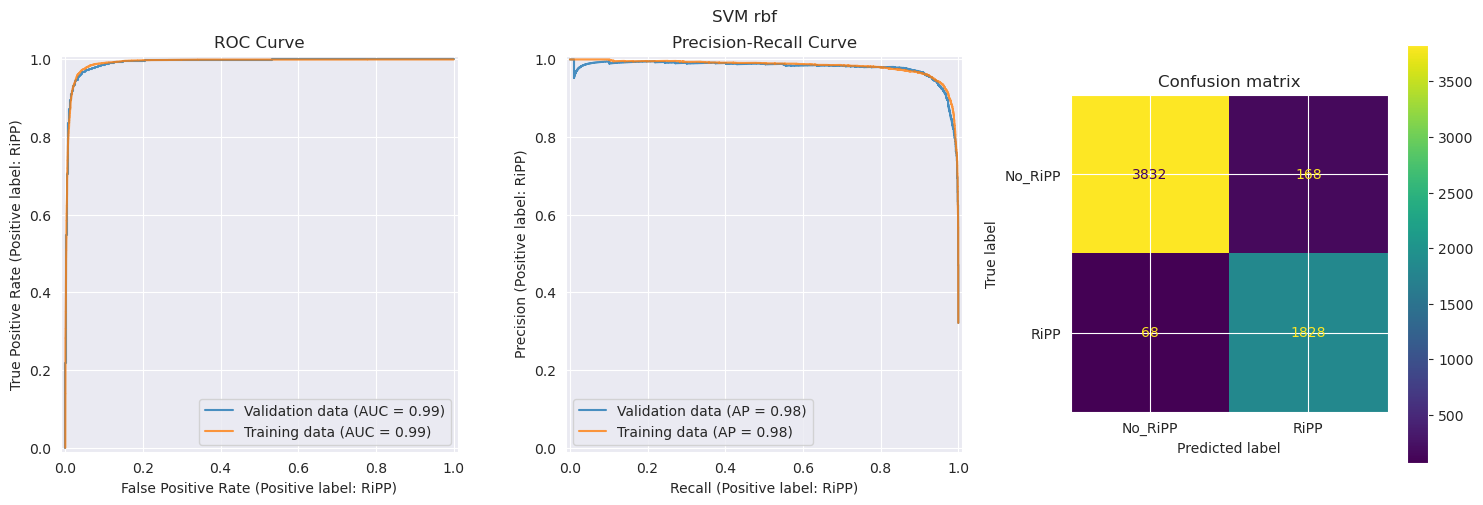

Feature length: 0.1430402162 ± 0.0035837830
Feature boman: 0.0495579509 ± 0.0021379027
Feature aliphatic: 0.0157279272 ± 0.0010831717
Feature charge: 0.0149333861 ± 0.0011122152
Feature instability: 0.0100916403 ± 0.0009039989
Feature PRIN1: 0.0085352189 ± 0.0004942174
Feature SVGER10: 0.0055928666 ± 0.0004424713
Feature Total_coil: 0.0041226266 ± 0.0003502292
Feature PRIN2: 0.0019988133 ± 0.0001144807
Feature Alpha50_leader: 0.0018941456 ± 0.0001512516
Feature Coil50_total: 0.0011775053 ± 0.0001662467
Feature SVGER3: 0.0009653085 ± 0.0001102342
Feature ProtFP2: 0.0008407964 ± 0.0000896337
Feature ProtFP1: 0.0007691060 ± 0.0000818808
Feature SVGER1: 0.0007347442 ± 0.0000967896
Feature SVGER11: 0.0006655459 ± 0.0001359966
Feature SVGER4: 0.0006646493 ± 0.0000939748
Feature ProtFP7: 0.0006539161 ± 0.0001066862
Feature ProtFP3: 0.0005823708 ± 0.0000834775
Feature Coil50_leader: 0.0004186841 ± 0.0000948553
Feature Alpha50_total: 0.0003567379 ± 0.0000339596
Feature SVGER7: 0.0003324103 ± 0.

In [3]:
x_train, x_test, y_train, y_test = svm_training_split('/lustre/BIF/nobackup/sanz006/positive_training/augmented_training_secstr_dataset_v1.csv',feature_list=complete_features)
svc_classification(x_train, x_test, y_train, y_test,feature_list=complete_features)

Grid search of C parameter

['RiPP' 'RiPP' 'RiPP' ... 'No_RiPP' 'No_RiPP' 'No_RiPP']
Fitting 39 folds for each of 8 candidates, totalling 312 fits


/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

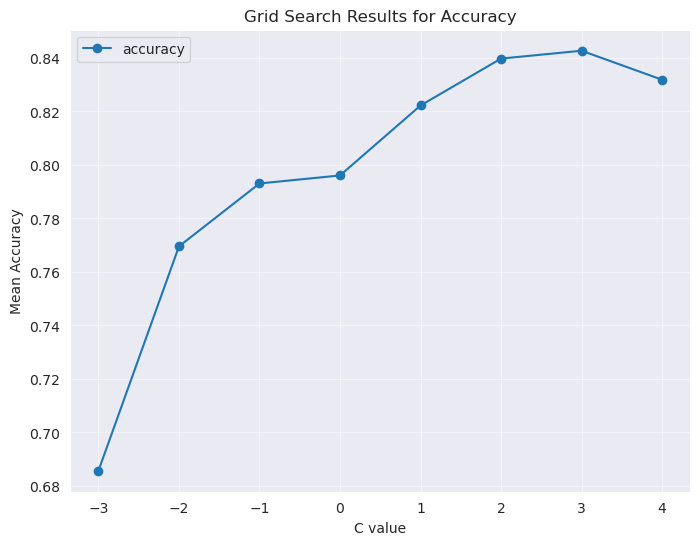

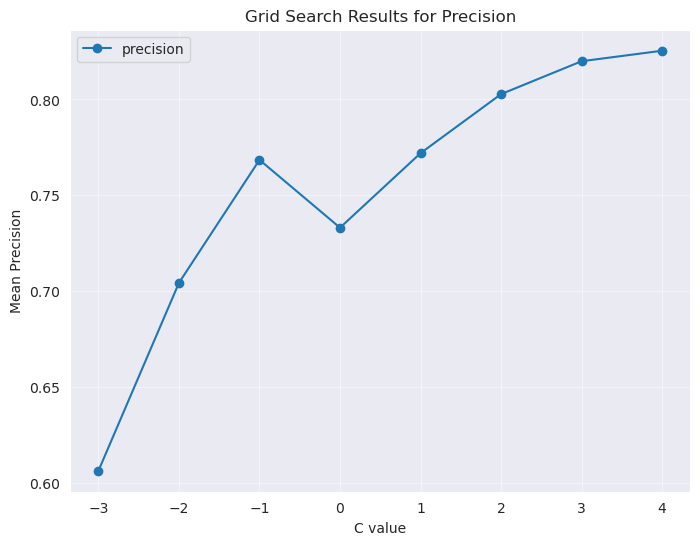

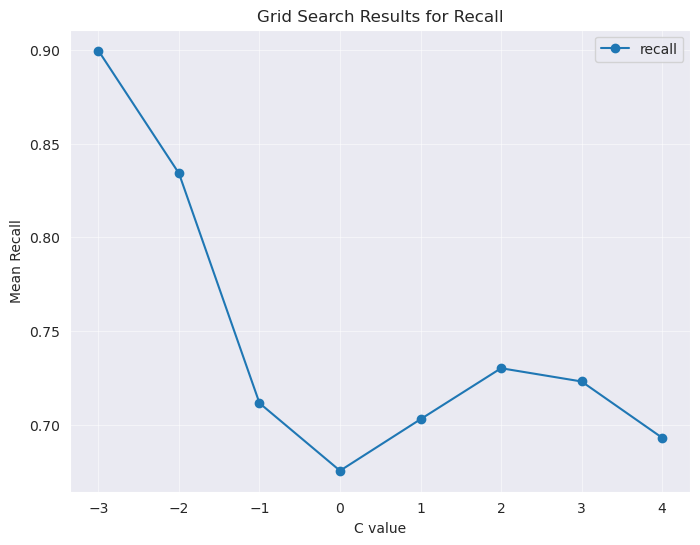

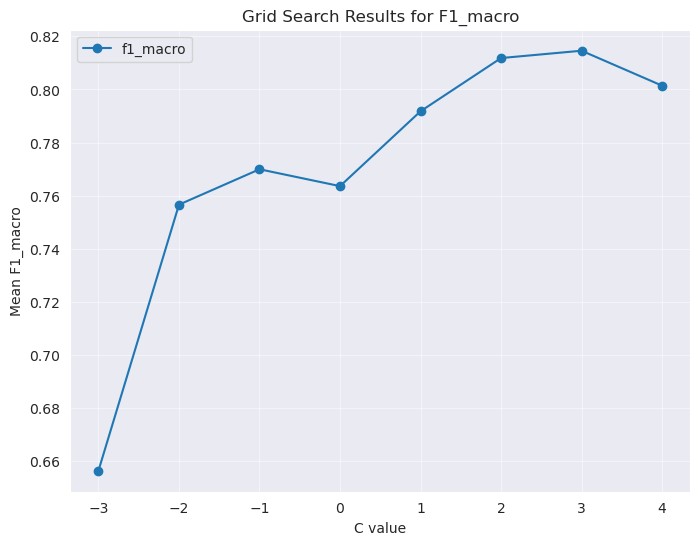

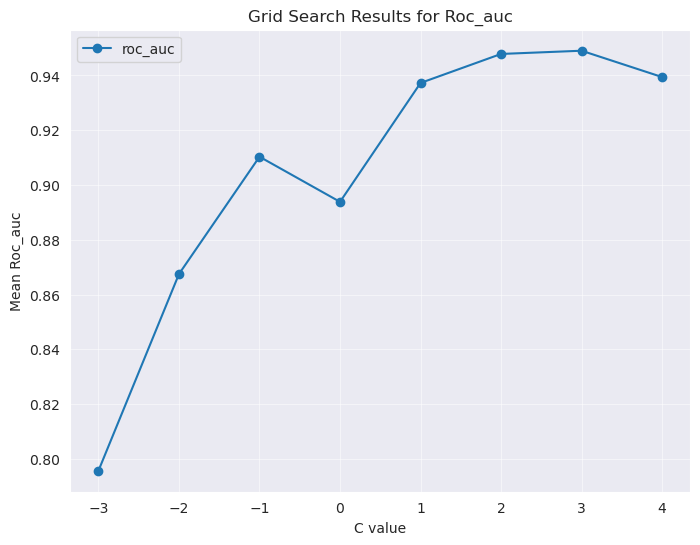

In [6]:
# Define the parameter grid
param_grid = {'C': [0.001,0.01,0.1, 1, 10,100,1000,10000]}  # Adjust C as needed

# Initialize SVM with polynomial kernel
scoring_metrics = {
    'accuracy': 'accuracy',  # Predefined scorer
    'precision': make_scorer(precision_score, pos_label='RiPP'),
    'recall': make_scorer(recall_score, pos_label='RiPP'),
    'f1_macro': 'f1_macro',  # Predefined scorer
    'roc_auc': 'roc_auc'  # Predefined scorer
}
rbf_svm = svm.SVC(kernel='rbf',class_weight="balanced")
dataset= pd.read_csv('/lustre/BIF/nobackup/sanz006/positive_training/augmented_training_secstr_dataset_v1.csv')
x,y=x_and_y(dataset,complete_features)
print(y)
my_cv=class_split_iterable(dataset,ripp_classes)
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rbf_svm, param_grid=param_grid, cv=my_cv, scoring=scoring_metrics, verbose=1, n_jobs=60,refit=False,error_score='raise')
grid_search.fit(x, y)

# Extract results
results = grid_search.cv_results_
cs= param_grid['C']
for metric in scoring_metrics.keys():
    mean_test_scores = []
    for c in cs:
        indices = [
            idx for idx, params in enumerate(results['params']) if params['C'] == c
        ]
        mean_test_scores.append(np.mean([results[f'mean_test_{metric}'][idx] for idx in indices]))
    
    # Plot for the current metric
    plt.figure(figsize=(8, 6))
    plt.plot(np.log10(cs), mean_test_scores, marker='o', linestyle='-', label=metric)
    plt.xlabel('C value')
    plt.ylabel(f'Mean {metric.capitalize()}')
    plt.title(f'Grid Search Results for {metric.capitalize()}')
    plt.xticks(np.log10(cs))
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()


Grid search on C value with class balance

[['Bottromycin']
 ['Bottromycin']
 ['Bottromycin']
 ...
 ['No_RiPP']
 ['No_RiPP']
 ['No_RiPP']]
Fitting 39 folds for each of 7 candidates, totalling 273 fits


/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


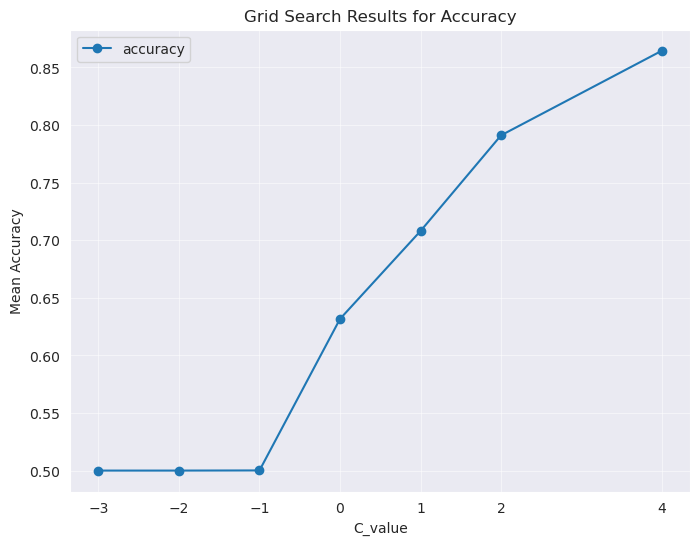

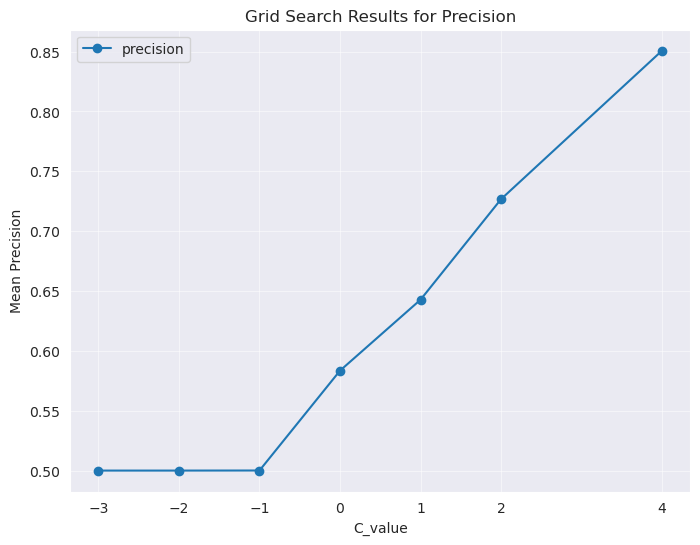

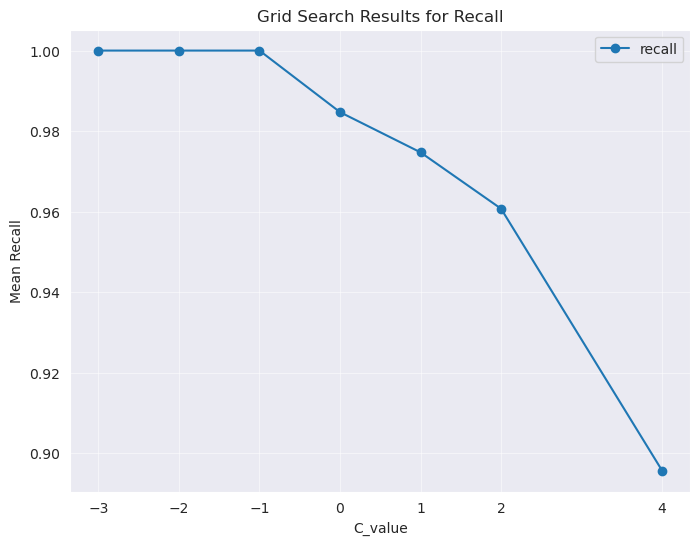

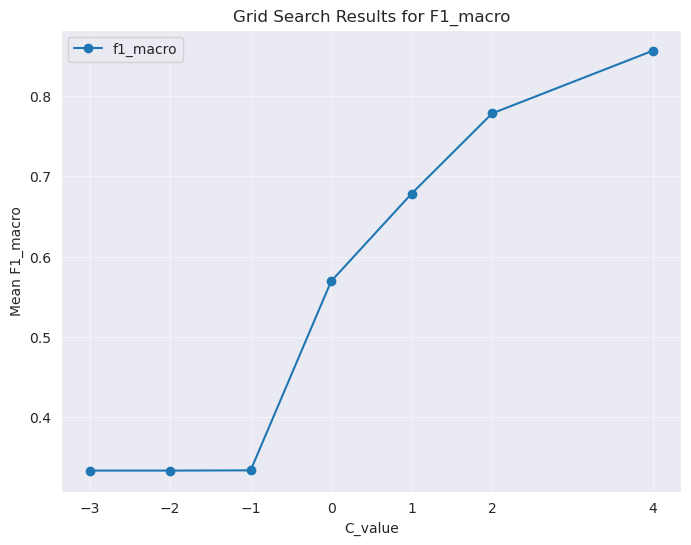

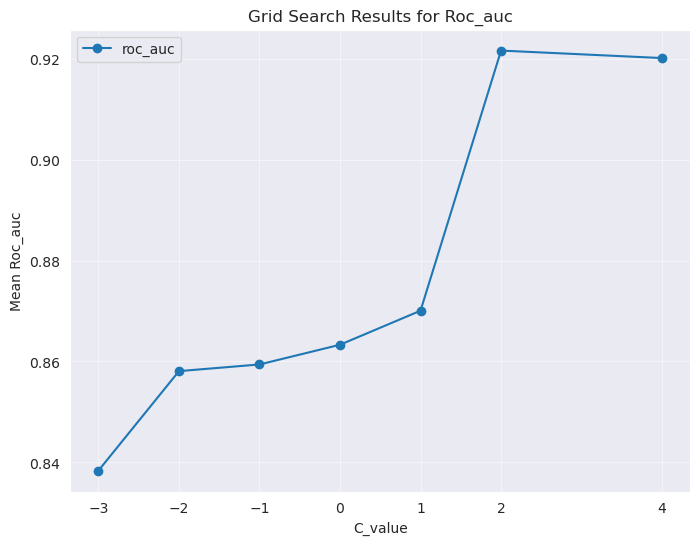

In [8]:
# Define the parameter grid
param_grid = {'C': [0.001,0.01,0.1, 1, 10,100,10000]}  # Adjust C as needed

# Initialize SVM with polynomial kernel
scoring_metrics = {
    'accuracy': 'accuracy',  # Predefined scorer
    'precision': make_scorer(precision_score, pos_label='RiPP'),
    'recall': make_scorer(recall_score, pos_label='RiPP'),
    'f1_macro': 'f1_macro',  # Predefined scorer
    'roc_auc': 'roc_auc'  # Predefined scorer
}
dataset= pd.read_csv('/lustre/BIF/nobackup/sanz006/positive_training/augmented_training_secstr_dataset_v1.csv')
labels=dataset[['Class']].to_numpy()
print(labels)
labels_flat=labels.flatten()
label_counts=Counter(labels_flat)
total_samples = len(labels)
unique_tags = len(label_counts)

# Calculate weights inversely proportional to frequencies
tag_weights = {tag: total_samples / (unique_tags * count) for tag, count in label_counts.items()}

sample_weights= np.array([tag_weights[label] for label in labels_flat])
rbf_svm = svm.SVC(kernel='rbf')

x,y=x_and_y(dataset,complete_features)
my_cv=class_split_iterable(dataset,ripp_classes)
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rbf_svm, param_grid=param_grid, cv=my_cv, scoring=scoring_metrics, verbose=1, n_jobs=60,refit=False,error_score='raise')
grid_search.fit(x, y,sample_weight=sample_weights)

# Extract results
results = grid_search.cv_results_
cs= param_grid['C']
for metric in scoring_metrics.keys():
    mean_test_scores = []
    for c in cs:
        indices = [
            idx for idx, params in enumerate(results['params']) if params['C'] == c
        ]
        mean_test_scores.append(np.mean([results[f'mean_test_{metric}'][idx] for idx in indices]))
    
    # Plot for the current metric
    plt.figure(figsize=(8, 6))
    plt.plot(np.log10(cs), mean_test_scores, marker='o', linestyle='-', label=metric)
    plt.xlabel('C_value')
    plt.ylabel(f'Mean {metric.capitalize()}')
    plt.title(f'Grid Search Results for {metric.capitalize()}')
    plt.xticks(np.log10(cs))
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()


Running model using validated data as validation set and predictions as training

In [9]:
dataset = pd.read_csv('/lustre/BIF/nobackup/sanz006/positive_training/augmented_training_secstr_dataset_v1.csv')

test1=dataset.loc[(dataset['RiPP']=='RiPP')&(dataset['validation']=='yes')]

train1=dataset.loc[(dataset['RiPP']=='No_RiPP')]
#create negative and positive test set
test2=train1.sample(n=4000, axis=0)
test=pd.concat([test1,test2])

train1=train1.drop(test2.index)
train2=dataset.loc[(dataset['RiPP']=='RiPP')&(dataset['validation']=='no')]
train=pd.concat([train1,train2])
x_train=train[complete_features]
x_test=test[complete_features]
y_train=train[["RiPP"]].to_numpy().ravel()
y_test=test[["RiPP"]].to_numpy().ravel()

In [10]:
rbf_svc = svm.SVC(C=1000,kernel="rbf",random_state=0,class_weight="balanced")
rbf_svc.fit(x_train, y_train)
#f_importances(abs(poly_svc.coef_[0]),feature_list)
y_pred = rbf_svc.predict(x_test)
print(y_pred)
print(len(y_pred))
print(len(y_test))
print(x_test.index.values.tolist())
print(len(x_test.index.values.tolist()))
test_indices=x_test.index.values.tolist()

['RiPP' 'RiPP' 'RiPP' ... 'No_RiPP' 'No_RiPP' 'No_RiPP']
4475
4475
[0, 7, 8, 17, 37, 131, 165, 207, 285, 320, 322, 333, 349, 351, 372, 418, 422, 425, 429, 430, 440, 453, 541, 542, 545, 561, 635, 677, 703, 707, 771, 772, 773, 780, 782, 783, 784, 837, 879, 916, 936, 942, 981, 984, 1043, 1053, 1054, 1070, 1105, 1138, 1174, 1215, 1225, 1245, 1252, 1343, 1348, 1351, 1432, 1460, 1494, 1539, 1540, 1571, 1574, 1596, 1606, 1628, 1650, 1665, 1667, 1678, 1679, 1694, 1744, 1749, 1801, 1811, 1818, 1835, 1859, 1865, 1868, 1882, 1913, 1925, 1955, 2023, 2035, 2095, 2096, 2097, 2098, 2133, 2156, 2233, 2270, 2275, 2279, 2281, 2299, 2300, 2323, 2422, 2430, 2432, 2465, 2467, 2533, 2544, 2545, 2566, 2574, 2577, 2584, 2585, 2586, 2590, 2591, 2593, 2595, 2638, 2653, 2680, 2717, 2753, 2775, 2781, 2842, 2913, 2983, 3032, 3101, 3170, 3171, 3230, 3232, 3300, 3307, 3309, 3313, 3317, 3338, 3360, 3418, 3432, 3462, 3477, 3537, 3538, 3553, 3554, 3563, 3575, 3578, 3610, 3620, 3628, 3684, 3763, 3815, 3848, 3849, 3932, 

In [11]:
fn_classes=[]
tp_classes=[]
for i in range(len(y_pred)):
    if y_pred[i]=='No_RiPP' and y_test[i]!='No_RiPP':
        fn_classes.append(dataset['Class'].iloc[test_indices[i]])
    elif y_pred[i]=='RiPP' and y_test[i]=='RiPP':
        tp_classes.append(dataset['Class'].iloc[test_indices[i]])
print(fn_classes)

['Lasso', 'Lasso', 'N-Formylated TBA', 'Proteusin', 'Dikaritin', 'Lasso', 'Crocagin', 'Proteusin', 'Lasso', 'Thioamitide', 'Thioamitide', 'Streptide', 'Methanobactin', 'Sulfatyrotide', 'Cyptide', 'Methanobactin', 'Methanobactin', 'Lasso', 'Pantocin', 'Linaridin', 'TBA', 'Cyptide', 'Cyptide', 'Graspetide', 'Glycocin', 'Graspetide', 'other', 'other', 'other', 'Cyptide', 'Lanthipeptide', 'Lanthipeptide', 'Cyptide', 'Cyptide', 'Cyclotide']


         No_RiPP  RiPP
No_RiPP     3806   194
RiPP          35   440


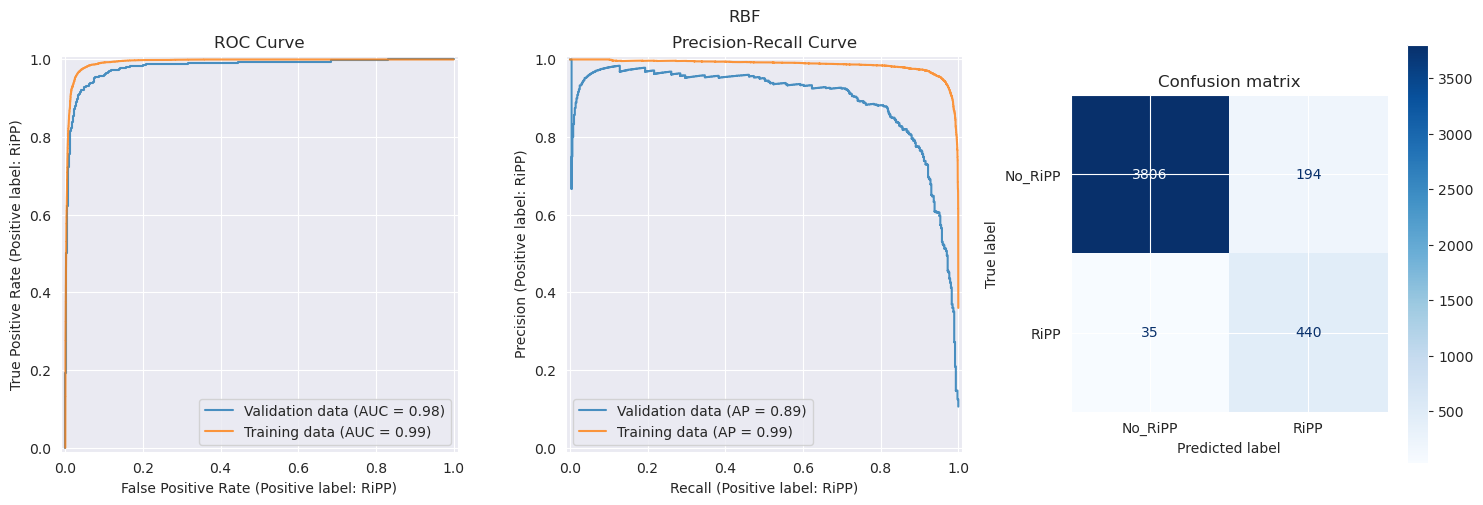

Feature length: 0.1457131053 ± 0.0119359627
Feature boman: 0.0562958947 ± 0.0037759750
Feature charge: 0.0152977368 ± 0.0038673819
Feature aliphatic: 0.0139948947 ± 0.0012180461
Feature instability: 0.0103201053 ± 0.0033341856
Feature PRIN1: 0.0079531579 ± 0.0011147822
Feature Total_coil: 0.0058717368 ± 0.0005897040
Feature SVGER10: 0.0048743158 ± 0.0009705733
Feature PRIN2: 0.0035406316 ± 0.0006781241
Feature Alpha50_leader: 0.0023393684 ± 0.0004486862
Feature SVGER11: 0.0019772632 ± 0.0002831366
Feature ProtFP2: 0.0017288947 ± 0.0003825447
Feature SVGER4: 0.0014736842 ± 0.0001875249
Feature Coil50_total: 0.0013823684 ± 0.0003199080
Feature SVGER1: 0.0013211579 ± 0.0003064204
Feature SVGER3: 0.0009929474 ± 0.0003832913
Feature Coil50_leader: 0.0008920526 ± 0.0002279480
Feature KF9: 0.0008533684 ± 0.0001155999
Feature ProtFP1: 0.0006370000 ± 0.0002694787
Feature T2: 0.0005811579 ± 0.0002328796
Feature ProtFP6: 0.0004732105 ± 0.0002054285
Feature ProtFP3: 0.0004248947 ± 0.0002319404
Fea

In [12]:
y_pred = rbf_svc.predict(x_test)
print(
    pd.DataFrame(
        confusion_matrix(y_test, y_pred),
        index=rbf_svc.classes_,
        columns=rbf_svc.classes_
    )
)
fig,axes=plt.subplots(1,3,figsize=(15,5))
RocCurveDisplay.from_estimator(
    rbf_svc, x_test, y_test, name="Validation data", ax=axes[0], alpha=0.8
)
RocCurveDisplay.from_estimator(rbf_svc,x_train,y_train,name='Training data', ax=axes[0],alpha=0.8)
axes[0].set_title('ROC Curve')
#plt.show()

PrecisionRecallDisplay.from_estimator(rbf_svc,x_test,y_test,name='Validation data',ax=axes[1], alpha=0.8)
PrecisionRecallDisplay.from_estimator(rbf_svc,x_train,y_train,name='Training data',ax=axes[1], alpha=0.8)
axes[1].set_title('Precision-Recall Curve')
#plt.show()

ConfusionMatrixDisplay.from_estimator(rbf_svc,x_test,y_test,ax=axes[2],cmap='Blues')
axes[2].set_title('Confusion matrix')

fig.suptitle(f'RBF')
plt.tight_layout()
plt.show()
# Compute permutation importance
perm_importance = permutation_importance(rbf_svc, x_test, y_test, n_repeats=10, scoring='roc_auc', random_state=42,n_jobs=20)
# Display feature importance
for i in perm_importance.importances_mean.argsort()[::-1]:
    print(f"Feature {complete_features[i]}: {perm_importance.importances_mean[i]:.10f} ± {perm_importance.importances_std[i]:.10f}")

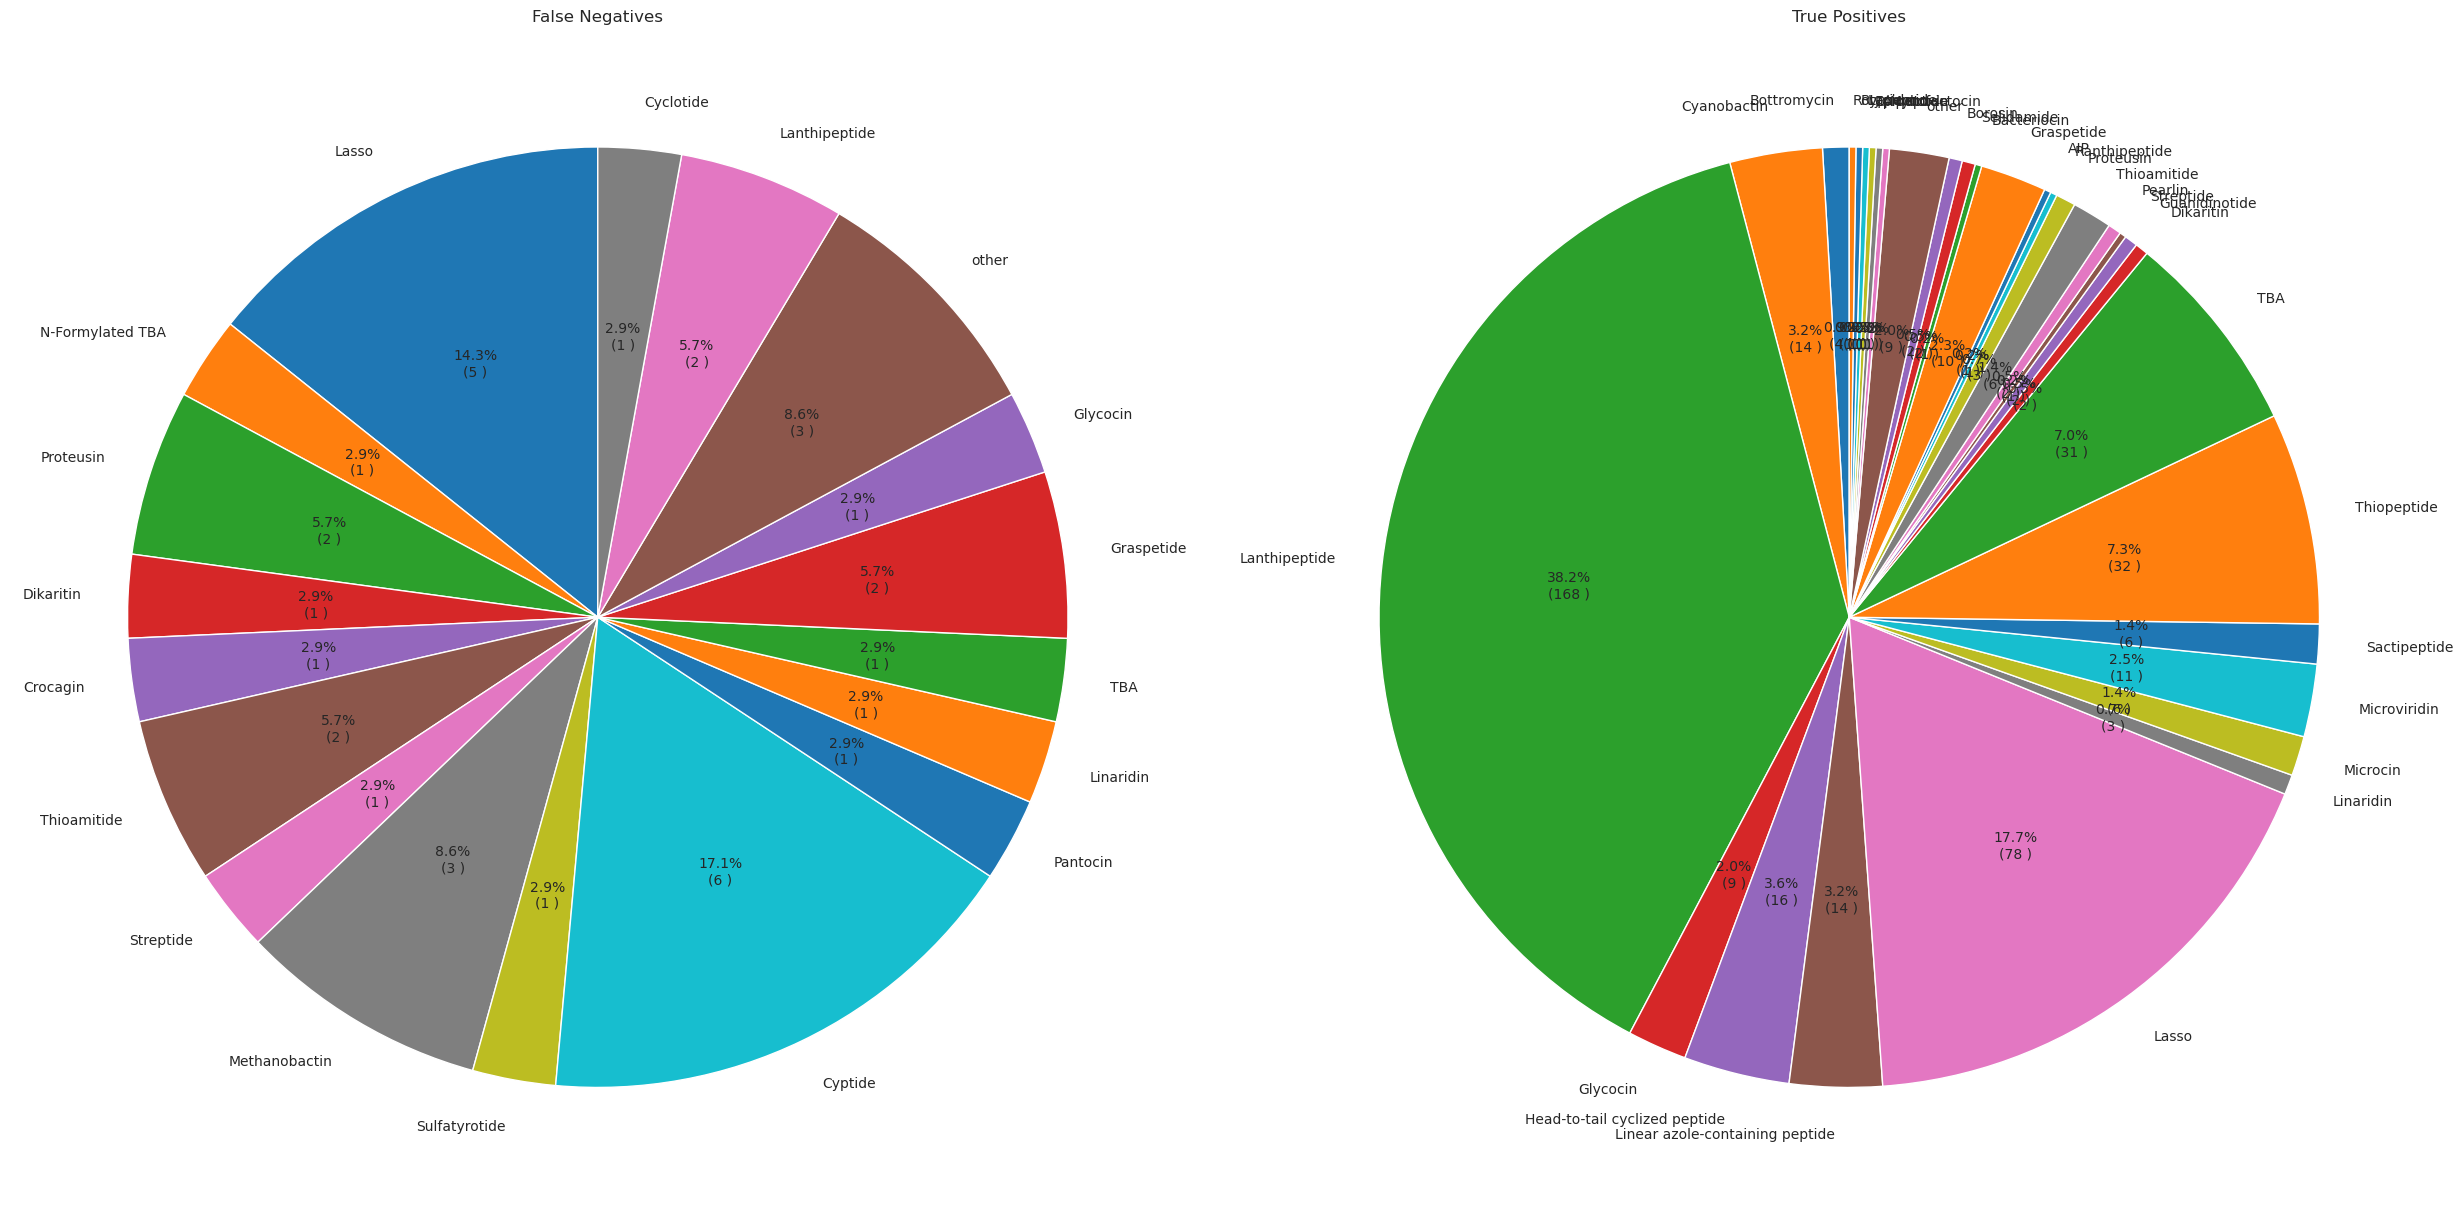

In [13]:
fn_data=[]
fn_labels=[]
for cat in fn_classes:
    if cat not in fn_labels:
        fn_labels.append(cat)
        fn_data.append(fn_classes.count(cat))

tp_data=[]
tp_labels=[]
for cat in tp_classes:
    if cat not in tp_labels:
        tp_labels.append(cat)
        tp_data.append(tp_classes.count(cat))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} )"

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(25, 12.5))  # 1 row, 2 columns

# First pie chart
axes[0].pie(fn_data, labels=fn_labels, autopct=lambda pct: func(pct, fn_data), startangle=90)
axes[0].set_title('False Negatives')

# Second pie chart
axes[1].pie(tp_data, labels=tp_labels, autopct=lambda pct: func(pct, tp_data), startangle=90)
axes[1].set_title('True Positives')

# Adjust layout and display
plt.tight_layout()
plt.show()